#### Работу выполнил Данил Исламов (Danil Islamoff, и на Stepik, и на Kaggle)

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Посмотрим на несколько случайных строк, чтобы получить представление о характере данных и
# убедиться, что файл был прочитан правильно 

data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1258,51,23.95,1216.35,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
4308,69,95.35,6382,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
3487,1,55.70,55.7,Male,0,Yes,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
3663,12,19.45,246.25,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4415,72,84.80,6141.65,Male,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),0
1854,8,92.10,729.95,Female,1,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
5024,71,66.80,4689.15,Female,0,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
1042,7,19.30,144.95,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1561,11,61.25,729.95,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,Yes,Electronic check,0
2290,70,25.40,1782.05,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Кажется, что нам нужно предсказать, уйдёт ли клиент из какой-то компании, занимающейся электроникой (цифровыми сервисами?), на основе некоторых данных о нём. Т.е. фактически, перед нами стоит задача бинарной классификации. 

In [6]:
# Посмотрим общую информацию о полученных данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как мы можем видеть, количество заполненных значений в каждом столбце совпадает с количеством наблюдений (RangeIndex: 5282 entries, 0 to 5281 — количество наблюдений, из таблицы выше). Однако, остаётся возможность, что в столбцах типа object есть какие-нибудь странные значения наподобие '.' или '?'.

Кроме того, заметим, что признак "IsSeniorCitizen", являющийся категориальным, в датафрейме был определён как числовой. В то же время признак "TotalSpent", который должен быть числовым, был определён как object.

По вышеизложенным причинам, проверим на всякий случай, какие значения принимают признаки, которые должны быть категориальными, и проверим, приведётся ли столбец TotalSpent к числовому типу.


In [7]:
for category in cat_cols:
    print(category, data[category].unique())

Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


Как мы можем видеть, ничего подозрительного в значениях категориальных признаков нет.

In [8]:
import traceback
try: 
    pd.to_numeric(data["TotalSpent"])
except:
    print(traceback.format_exc())

Traceback (most recent call last):
  File "pandas/_libs/lib.pyx", line 2003, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string " "

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-8-1e5d6f58adf3>", line 3, in <module>
    pd.to_numeric(data["TotalSpent"])
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/tools/numeric.py", line 153, in to_numeric
    values, set(), coerce_numeric=coerce_numeric
  File "pandas/_libs/lib.pyx", line 2040, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string " " at position 1048



Видим, что в 1048-м наблюдении в столбце TotalSpent пропущено значение, однако явно это не указано, и в нём стоит " ". Поскольку такое значение может быть ещё в каких-то строках, выкинем их все сразу, и попробуем ещё раз привести TotalSpent к числовому виду.



In [9]:
data.drop(data[data["TotalSpent"] == " "].index, inplace=True)

In [10]:
# Посмотрим, удалилась ли найденная строка и посмотрим на новый размер 
# датафрейма

print(data[1047:1049])
print(data.shape)

      ClientPeriod  MonthlySpending  ...     PaymentMethod Churn
1047            16            49.95  ...  Electronic check     1
1049            68            53.00  ...  Electronic check     0

[2 rows x 20 columns]
(5273, 20)


Как мы можем заметить, строка с пропущенным значением была не одна.


In [11]:
import traceback
try: 
    data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])
except:
    print(traceback.format_exc())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

Больше ничего подозрительного не видно — перейдём к следующему этапу. 

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

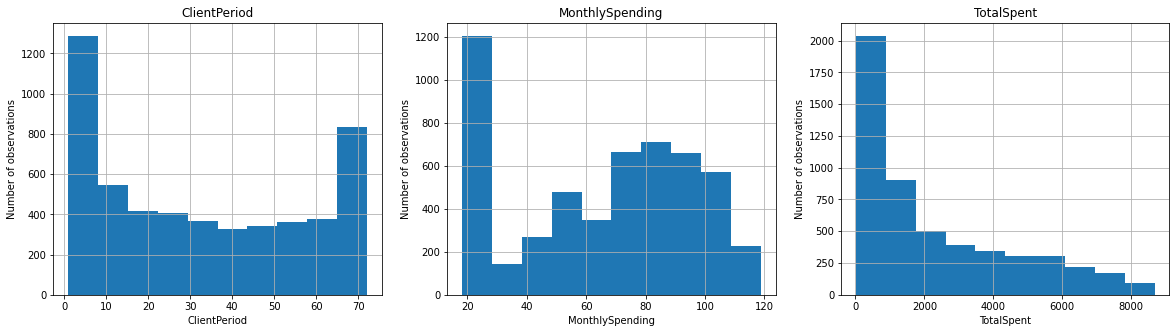

In [13]:
# Посмотрим на распределение численных признаков
featFreq = []
for col in num_cols:
    featFreq.append(dict(data[col].value_counts()))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i in range(3):
        axes[i].hist(data[num_cols[i]])
        axes[i].set(title=num_cols[i])
        axes[i].grid()
        axes[i].set_xlabel(num_cols[i])
        axes[i].set_ylabel("Number of observations")


Ничего странного в распределении численных признаков не наблюдается.

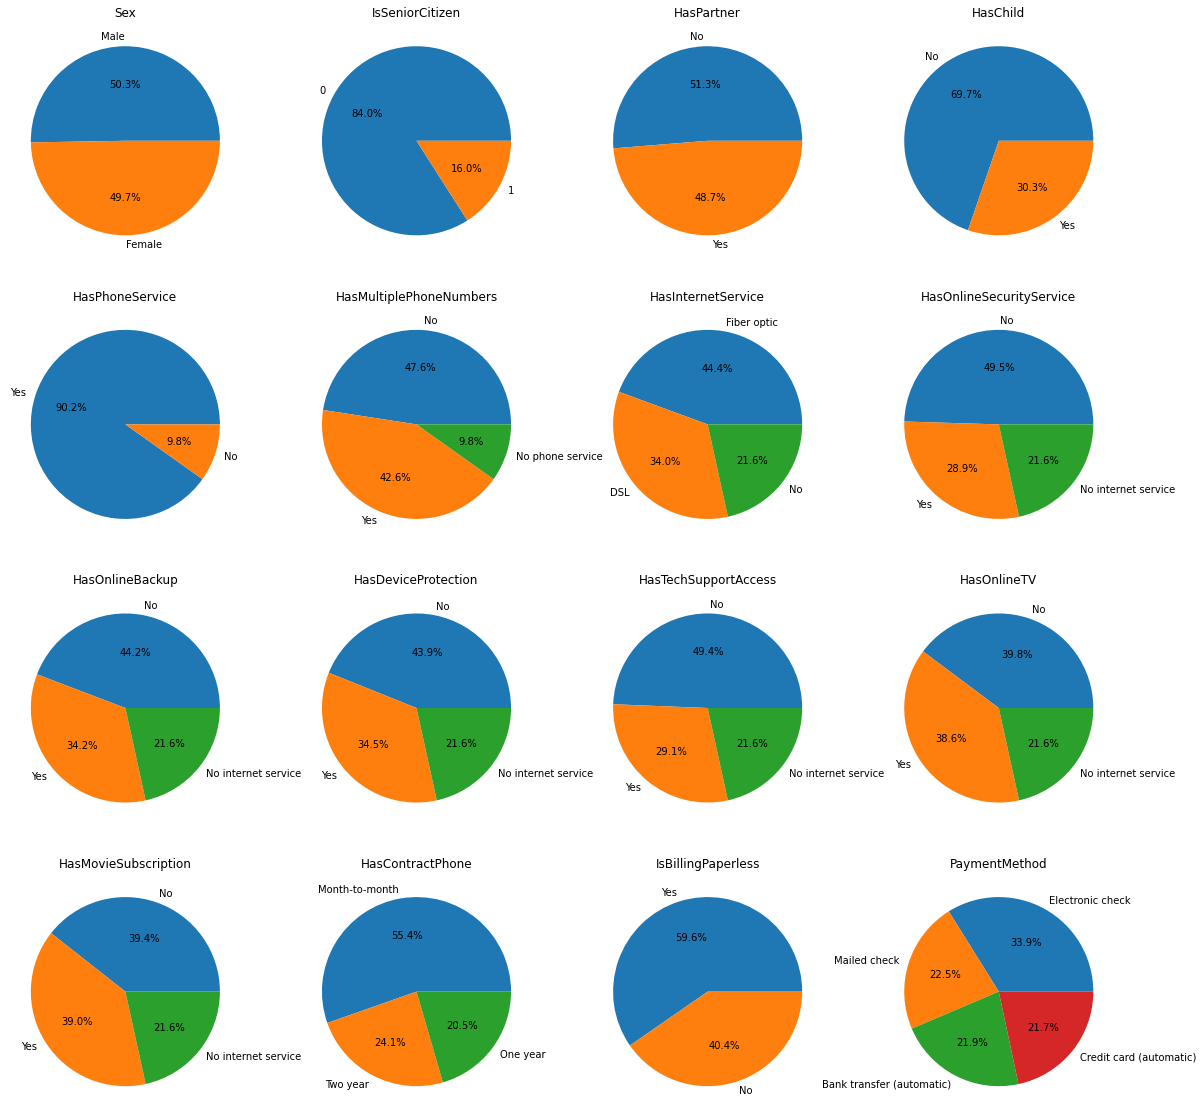

In [14]:
# Посмотрим на распределение категориальных признаков

featFreq = []
for col in cat_cols:
    featFreq.append(dict(data[col].value_counts()))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        axes[i][j].pie(featFreq[i * 4 + j].values(), labels=featFreq[i * 4 + j].keys(), autopct='%1.1f%%')
        axes[i][j].set(title=cat_cols[i * 4 + j])


В распределении категориальных признаков также ничего подозрительного.

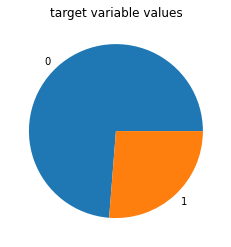

In [15]:
# Посмотрим на распределение целевой переменной

val = dict(data[target_col].value_counts())
plt.pie(val.values(), labels=val.keys())
plt.title("target variable values")
plt.show()

Видно, что классы распределены в отношении примерно 1:3, поэтому сильного дисбаланса нет.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [17]:
X = data[feature_cols]
y = data[target_col]

In [18]:
# Закодируем категориальные переменные

X = pd.get_dummies(X, columns=cat_cols)

In [19]:
# Разделим выборку на train и test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [20]:
# Отнормируем числовые признаки

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Обучим модель

regressor = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], scoring="roc_auc", refit=True)
regressor.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], class_weight=None,
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [22]:
# Получим значение гиперпараметра, при котором было достигнуто лучшее качество

regressor.C_

array([10.])

In [23]:
# Получим значения весов, при которых было достигнуто лучшее качество

regressor.coef_

array([[-1.53726540e+00, -2.00078635e+00,  8.37643546e-01,
         2.36156447e-03, -2.36156447e-03, -5.64029449e-02,
         5.64029449e-02,  1.44194636e-03, -1.44194636e-03,
         2.78835614e-02, -2.78835614e-02, -1.03945528e-01,
         1.03945528e-01, -1.44366216e-01, -1.03945528e-01,
         2.08711236e-01, -4.87614174e-01,  6.24944405e-01,
        -1.94774595e-01,  1.26442118e-01, -1.94774595e-01,
         3.70681350e-02,  6.68058065e-02, -1.94774595e-01,
         9.87261399e-02,  1.98732323e-02, -1.94774595e-01,
         1.47544001e-01,  1.11647456e-01, -1.94774595e-01,
         5.31820940e-02, -1.15070365e-01, -1.94774595e-01,
         2.80629704e-01, -1.02984643e-01, -1.94774595e-01,
         2.67816136e-01,  3.09334279e-01, -5.37174805e-02,
        -3.08833891e-01, -9.06936023e-02,  9.06936023e-02,
        -1.78285660e-02, -8.99376464e-02,  1.21622071e-01,
        -3.16868178e-02]])

In [24]:
# Оценим качество модели на тестовой выборке

regressor.score(X_test, y_test)

0.8438829912715263

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.843882

Лучший параметр: C = 10


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
# Протестируем catboost "из коробки"

from catboost import CatBoostClassifier

X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

booster = CatBoostClassifier(cat_features=cat_cols, 
                             custom_metric='AUC:hints=skip_train~false')
booster.fit(X_train, y_train)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 68ms	remaining: 1m 7s
1:	learn: 0.6683861	total: 82.4ms	remaining: 41.1s
2:	learn: 0.6574055	total: 93.2ms	remaining: 31s
3:	learn: 0.6459140	total: 106ms	remaining: 26.4s
4:	learn: 0.6353605	total: 120ms	remaining: 23.9s
5:	learn: 0.6261610	total: 131ms	remaining: 21.7s
6:	learn: 0.6167841	total: 143ms	remaining: 20.2s
7:	learn: 0.6080311	total: 154ms	remaining: 19.1s
8:	learn: 0.5997483	total: 167ms	remaining: 18.3s
9:	learn: 0.5918432	total: 179ms	remaining: 17.7s
10:	learn: 0.5839242	total: 192ms	remaining: 17.2s
11:	learn: 0.5766678	total: 207ms	remaining: 17s
12:	learn: 0.5701751	total: 214ms	remaining: 16.3s
13:	learn: 0.5631203	total: 228ms	remaining: 16s
14:	learn: 0.5566815	total: 239ms	remaining: 15.7s
15:	learn: 0.5507060	total: 252ms	remaining: 15.5s
16:	learn: 0.5449043	total: 265ms	remaining: 15.3s
17:	learn: 0.5390888	total: 277ms	remaining: 15.1s
18:	learn: 0.5338561	total: 290ms	remaining: 15s
19:	learn: 0.52917

In [26]:
y_train_pred = booster.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_train_pred)

0.8934524745969756

In [27]:
y_test_pred = booster.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_pred)

0.8404411417787214

In [28]:
# Теперь попробуем поперебирать гиперпараметры чтобы получить лучшее качество

#booster = CatBoostClassifier(cat_features=cat_cols, custom_metric='AUC:hints=skip_train~false')
#grid = {'learning_rate': np.arange(0.01, 0.06, 0.01),
#        'depth': np.arange(1, 4),
#       'iterations': [1000, 1250, 1500, 1750, 2000]}
#grid_search_result = booster.grid_search(grid, 
#                                       X=X_train, 
#                                       y=y_train, 
#                                       plot=True)

In [29]:
#grid_search_result['params']

# >> {'depth': 1, 'iterations': 1250, 'learning_rate': 0.04}

In [30]:
# Оценим качество модели с полученными гиперпараметрами:

booster = CatBoostClassifier(cat_features=cat_cols,
                             **{'depth': 1, 'iterations': 1250, 
                                'learning_rate': 0.04},
                             custom_metric='AUC:hints=skip_train~false')
booster.fit(X_train, y_train)

0:	learn: 0.6784358	total: 3.32ms	remaining: 4.15s
1:	learn: 0.6650095	total: 6.89ms	remaining: 4.3s
2:	learn: 0.6554092	total: 9.6ms	remaining: 3.99s
3:	learn: 0.6440349	total: 12.1ms	remaining: 3.75s
4:	learn: 0.6359123	total: 14.6ms	remaining: 3.63s
5:	learn: 0.6263266	total: 17.5ms	remaining: 3.63s
6:	learn: 0.6193223	total: 20ms	remaining: 3.55s
7:	learn: 0.6114524	total: 22.4ms	remaining: 3.48s
8:	learn: 0.6048301	total: 24.9ms	remaining: 3.44s
9:	learn: 0.5981036	total: 27.5ms	remaining: 3.4s
10:	learn: 0.5913275	total: 30.1ms	remaining: 3.39s
11:	learn: 0.5857756	total: 32.7ms	remaining: 3.37s
12:	learn: 0.5797426	total: 35.3ms	remaining: 3.36s
13:	learn: 0.5744462	total: 37.8ms	remaining: 3.34s
14:	learn: 0.5667240	total: 40.4ms	remaining: 3.33s
15:	learn: 0.5597047	total: 43ms	remaining: 3.31s
16:	learn: 0.5533502	total: 45.7ms	remaining: 3.31s
17:	learn: 0.5476364	total: 48.2ms	remaining: 3.3s
18:	learn: 0.5424107	total: 50.7ms	remaining: 3.29s
19:	learn: 0.5376760	total: 53

In [31]:
y_train_pred = booster.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_train_pred)

0.8563524623350423

In [32]:
y_test_pred = booster.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_pred)

0.8467869780608634

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8467869

Лучшие параметры: depth = 1, iterations = 1250, learning_rate = 0.04 


# Предсказания

In [33]:
best_model = booster

In [34]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

Kaggle score: 0.85230

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.